In [1]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image


In [2]:
ww, hh = 800, 800
ox, oy = 400,400
N_resource = 20
N_agent = ww*hh
R_agent = 1/ww * 5

# place the seed of the organism in the centre of the image
organism = np.zeros((ww,hh), dtype='f8')
organism[ox-1:ox+1,oy-1:oy+1] = 1
Atrail = np.zeros((ww,hh), dtype='f8' )
Btrial = np.zeros((ww,hh), dtype = 'f8')

# spawn locations
# place resources in blobs around the perimeter
resource_layer = np.zeros_like(organism)
for i in range(N_resource):
    angle = 2*np.pi * i/N_resource
    radius = np.random.random()*oy
    u,v = np.round(radius*np.r_[np.cos(angle), np.sin(angle)]).astype(int)
    resource_layer[u+ox,v+oy] = 1

heading = np.zeros_like(organism)
locx = np.zeros_like(organism)
locy = np.zeros_like(organism)

radius = R_agent
for i in range(N_agent):
    u = i%ww
    v = (i-i%ww) // ww
    angle = 2*np.pi * i/N_agent
    x,y = radius*np.r_[np.cos(angle), np.sin(angle)]
    locx[u,v] = x
    locy[u,v] = y
    heading[u,v] = np.random.randint()

#uvs = [(radius*np.cos(2*np.pi * i/N_agent), radius*np.sin(2*np.pi * i/N_agent)) for i in range(N_agent)]

In [3]:
def to_uint_img(imgf8):
    return (imgf8 *255).astype('uint8')

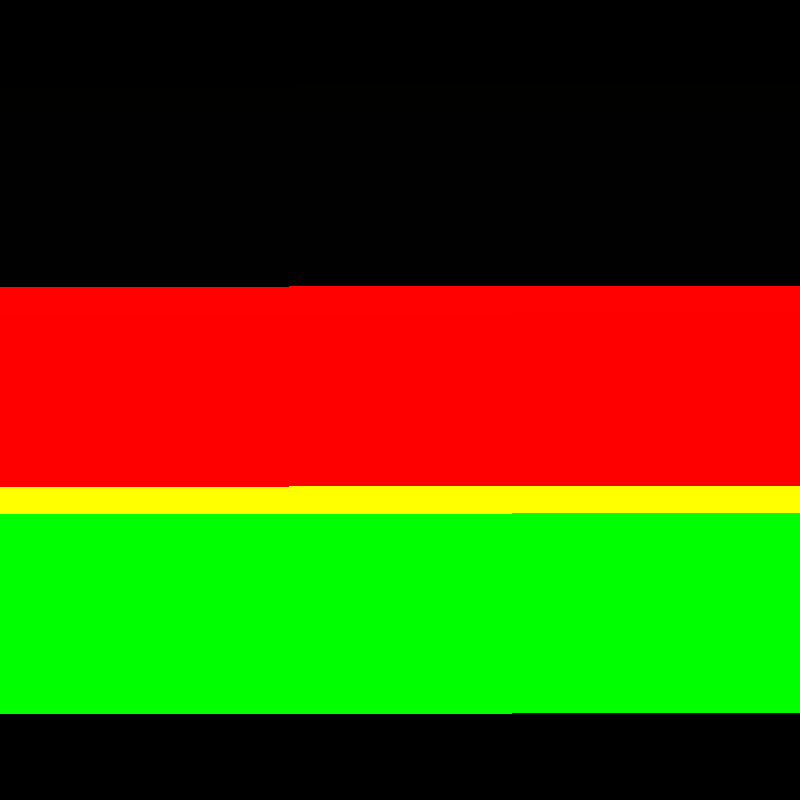

In [4]:
orgtex = to_uint_img(np.transpose(np.array((locx, locy, Atrail))))
Image.fromarray(orgtex)
#worldtex = to_uint_img(np.transpose(np.array((resource_layer, Atrail, Btrial))))

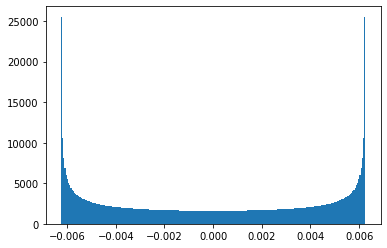

In [19]:
plt.hist(locy[:,:].reshape(-1), bins=255);

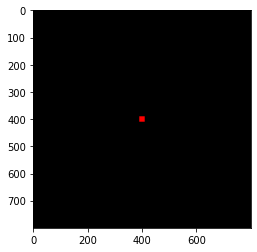

In [26]:
plt.imshow(np.transpose(np.array((organism, Atrail, Btrial))))

In [25]:
np.transpose(np.array((organism, Atrail, Btrial)))

(800, 800, 3)

In [6]:
np.c_?

Type:        CClass
String form: <numpy.lib.index_tricks.CClass object at 0x0000022ECEA05DF0>
Length:      0
File:        c:\users\andre\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\index_tricks.py
Docstring:  
Translates slice objects to concatenation along the second axis.

This is short-hand for ``np.r_['-1,2,0', index expression]``, which is
useful because of its common occurrence. In particular, arrays will be
stacked along their last axis after being upgraded to at least 2-D with
1's post-pended to the shape (column vectors made out of 1-D arrays).

See Also
--------
column_stack : Stack 1-D arrays as columns into a 2-D array.
r_ : For more detailed documentation.

Examples
--------
>>> np.c_[np.array([1,2,3]), np.array([4,5,6])]
array([[1, 4],
       [2, 5],
       [3, 6]])
>>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
array([[1, 2, 3, ..., 4, 5, 6]])
